# Real Estate Analysis

## Overview

This project is an analysis of real estate within California. The goal of the project is to be able to predict sale price based on the features of the house. 

## Business Problem

The business problem for this project is to accurately price houses for sale according to the features of the house. 

## Data Understanding

The California Real Estate dataset from Kaggle has around 35,000 records of houses within the state. There are a total of 38 columns and include data such as location, size, and amenities. 

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv('data/RealEstate_California.csv', index_col=0) #loading the data
df.head() #Viewing the first five rows of data

,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,time,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,1.610496e+12,...,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,1.626048e+12,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,1.625702e+12,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,1.625616e+12,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,1.625616e+12,...,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County


In [3]:
df.info() #Looking at the overall columns/features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35389 entries, 0 to 35388
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  35389 non-null  object 
 1   stateId             35389 non-null  int64  
 2   countyId            35389 non-null  int64  
 3   cityId              35389 non-null  int64  
 4   country             35389 non-null  object 
 5   datePostedString    35386 non-null  object 
 6   is_bankOwned        35389 non-null  int64  
 7   is_forAuction       35389 non-null  int64  
 8   event               35389 non-null  object 
 9   time                35100 non-null  float64
 10  price               35389 non-null  float64
 11  pricePerSquareFoot  35389 non-null  float64
 12  city                35389 non-null  object 
 13  state               35389 non-null  object 
 14  yearBuilt           35389 non-null  int64  
 15  streetAddress       35389 non-null  object 
 16  zipc

In [4]:
df['streetAddress'].duplicated().sum() #Checking for duplicated addresses

4259

In [5]:
df.drop_duplicates(['streetAddress'], keep='first', inplace=True) #Dropping duplicate addresses and keeping the first
df['streetAddress'].duplicated().sum() #Verifying duplicated values for address have been dropped

0

In [6]:
print(f'There are {df.duplicated().sum()} duplicated values') #Checking for any duplicates for all data

There are 0 duplicated values


In [8]:
df.drop(['id', 
         'stateId', 
         'country', 
         'cityId', 
         'countyId', 
         'time',  
         'state', 
         'currency',
         'streetAddress'], 
         axis=1, 
         inplace=True) 
#Dropping variables without predictor value or redundant

In [10]:
df.isna().sum() #checking for null values

datePostedString        3
is_bankOwned            0
is_forAuction           0
event                   0
price                   0
pricePerSquareFoot      0
city                    0
yearBuilt               0
zipcode                22
longitude               0
latitude                0
hasBadGeocode           0
description           252
livingArea              0
livingAreaValue         0
lotAreaUnits            0
bathrooms               0
bedrooms                0
buildingArea            0
parking                 0
garageSpaces            0
hasGarage               0
levels                  0
pool                    0
spa                     0
isNewConstruction       0
hasPetsAllowed          0
homeType                0
county                  0
dtype: int64

In [11]:
df.dropna(inplace=True) #dropping null values since there aren't too many when looking at the overall dataset

In [12]:
df.isna().sum() #verifying there's no more nulls

datePostedString      0
is_bankOwned          0
is_forAuction         0
event                 0
price                 0
pricePerSquareFoot    0
city                  0
yearBuilt             0
zipcode               0
longitude             0
latitude              0
hasBadGeocode         0
description           0
livingArea            0
livingAreaValue       0
lotAreaUnits          0
bathrooms             0
bedrooms              0
buildingArea          0
parking               0
garageSpaces          0
hasGarage             0
levels                0
pool                  0
spa                   0
isNewConstruction     0
hasPetsAllowed        0
homeType              0
county                0
dtype: int64

In [13]:
df['year'] = pd.to_datetime(df['datePostedString']) #Converting date posted to year to observe yearly trends
df['year'] = df['year'].dt.year
df.drop(['datePostedString'], inplace=True, axis=1) #Dropping original date posted column

### Feature Analysis

In [14]:
def feature_corr(feature):
    feature_corr = df_single['price'].corr(df_single[feature])
    return print(f'{feature.title()} correlation with popularity is {feature_corr}')

def feature_analysis(feature):
    '''Creates distplot and graph of feature and mean of price along with correlation and value counts'''
    
    feature_corr(feature)
    
    print(df_single[feature].value_counts(normalize=True))
    
    fig, ax = plt.subplots(figsize=(15,8))
    sns.distplot(df_single[feature], ax=ax)
    ax.set_title(f'{feature.title()} Distribution', fontsize=16)
    ax.set_xlabel(f'{feature.title()}', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)
    
    print(df_single[feature].describe())
    
    feature_price_mean = df_single.groupby(feature)['price'].mean()
    
    fig, ax = plt.subplots(figsize=(15,8))
    ax.scatter(feature_price_mean.index, feature_price_mean.values, alpha=.3)
    ax.set_title(f'{feature.title()} vs Mean Price', fontsize=16)
    ax.set_xlabel(f'{feature.title()}', fontsize=14)
    ax.set_ylabel('Mean Price', fontsize=14)
    return plt.show();

## Single Family Home Analysis

In [15]:
df['homeType'].value_counts()

SINGLE_FAMILY    19400
LOT               5554
CONDO             2831
MULTI_FAMILY      2104
TOWNHOUSE          963
APARTMENT            1
Name: homeType, dtype: int64

In [16]:
df_single = df[df['homeType'] == 'SINGLE_FAMILY'] #Filtering out the data for single family homes only
df_single['homeType'].value_counts()

SINGLE_FAMILY    19400
Name: homeType, dtype: int64

#### Bank Owned

In [17]:
df_single['is_bankOwned'].value_counts(normalize=True) #Seeing how many homes are bank owned

0    0.999845
1    0.000155
Name: is_bankOwned, dtype: float64

Is_Bankowned correlation with popularity is -0.005470478669073181
0    0.999845
1    0.000155
Name: is_bankOwned, dtype: float64


C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    19400.000000
mean         0.000155
std          0.012435
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_bankOwned, dtype: float64


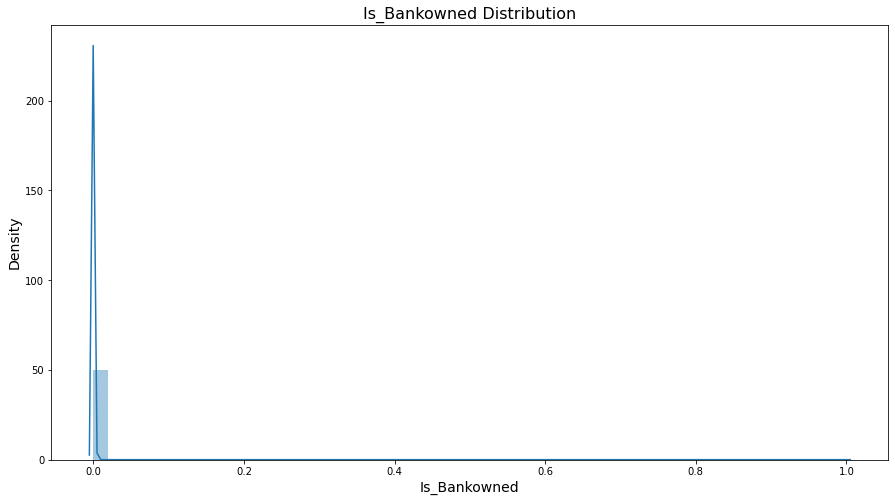

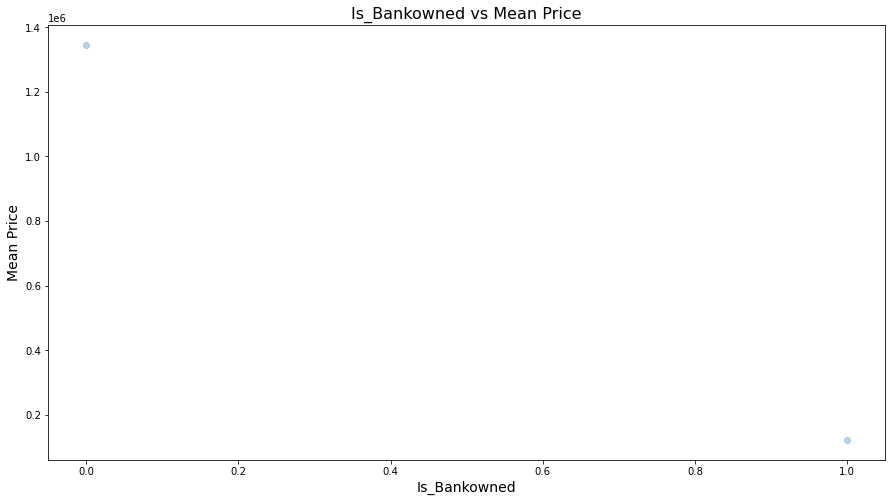

In [18]:
feature_analysis('is_bankOwned')

In [19]:
df_single = df_single[df_single['is_bankOwned'] == 0] #Filtering out houses that are bank owned
df_single['is_bankOwned'].value_counts() #Verifying no more bank owned homes

0    19397
Name: is_bankOwned, dtype: int64

In [20]:
df_single.drop('is_bankOwned', axis=1, inplace=True)  #Dropping the column since they're all non bank owned properties

#### Auction

In [21]:
df_single['is_forAuction'].value_counts(normalize=True) #Seeing how many homes are for auction

0    0.999227
1    0.000773
Name: is_forAuction, dtype: float64

Is_Forauction correlation with popularity is 0.022486673473050472
0    0.999227
1    0.000773
Name: is_forAuction, dtype: float64


C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    19397.000000
mean         0.000773
std          0.027799
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_forAuction, dtype: float64


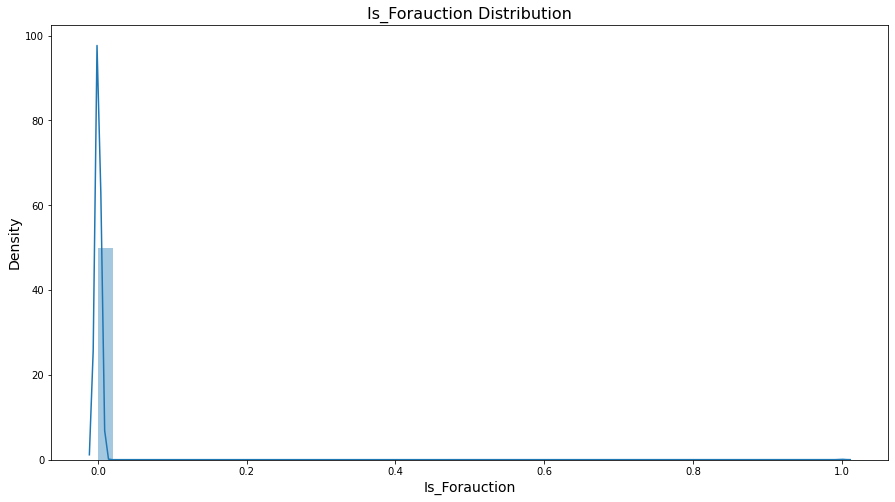

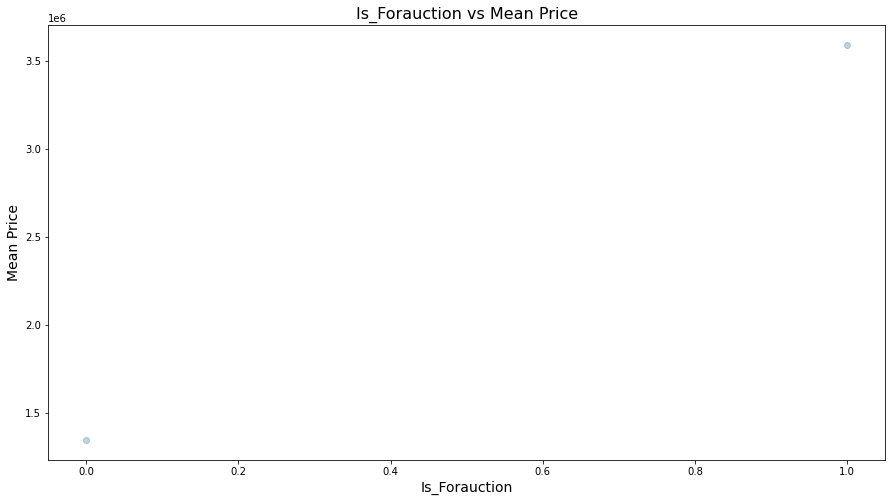

In [22]:
feature_analysis('is_forAuction')

In [23]:
df_single = df_single[df_single['is_forAuction'] == 0] #Filtering out homes for auction
df_single['is_forAuction'].value_counts() #Verifying no more homes for auction

0    19382
Name: is_forAuction, dtype: int64

In [24]:
df_single.drop('is_forAuction', axis=1, inplace=True) #Dropping the column since no homes are for auction

#### Event

In [25]:
df_single['event'].value_counts()

Listed for sale    13950
Price change        2910
Listing removed     1660
Sold                 695
None                 165
Listed for rent        1
Pending sale           1
Name: event, dtype: int64

In [26]:
df_single.drop(['event'], axis=1, inplace=True) #Dropping the event column since we'll be looking at all the houses

#### Bathrooms

In [27]:
df_single['bathrooms'].value_counts()

2.0     7508
3.0     5917
1.0     2319
4.0     1746
5.0      830
6.0      380
0.0      246
7.0      188
8.0      119
9.0       52
10.0      27
11.0      19
12.0      14
14.0       6
13.0       5
15.0       1
25.0       1
20.0       1
58.0       1
21.0       1
22.0       1
Name: bathrooms, dtype: int64

In [28]:
avg_price_bath_single = df_single.groupby('bathrooms')['price'].mean().sort_values(ascending=False)
avg_price_bath_single

bathrooms
25.0    8.500000e+07
21.0    7.800000e+07
22.0    6.500000e+07
20.0    4.800000e+07
58.0    2.900000e+07
13.0    2.870900e+07
12.0    2.461636e+07
14.0    2.083300e+07
11.0    1.981579e+07
10.0    1.428259e+07
9.0     1.196734e+07
8.0     8.727528e+06
7.0     7.074280e+06
6.0     4.388978e+06
15.0    3.895000e+06
5.0     3.079481e+06
4.0     1.899812e+06
0.0     1.415886e+06
3.0     1.092848e+06
2.0     7.511688e+05
1.0     5.967947e+05
Name: price, dtype: float64

Bathrooms correlation with popularity is 0.5594385580496497
2.0     0.387370
3.0     0.305283
1.0     0.119647
4.0     0.090084
5.0     0.042823
6.0     0.019606
0.0     0.012692
7.0     0.009700
8.0     0.006140
9.0     0.002683
10.0    0.001393
11.0    0.000980
12.0    0.000722
14.0    0.000310
13.0    0.000258
15.0    0.000052
25.0    0.000052
20.0    0.000052
58.0    0.000052
21.0    0.000052
22.0    0.000052
Name: bathrooms, dtype: float64
count    19382.000000
mean         2.692859
std          1.490153
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: bathrooms, dtype: float64


C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


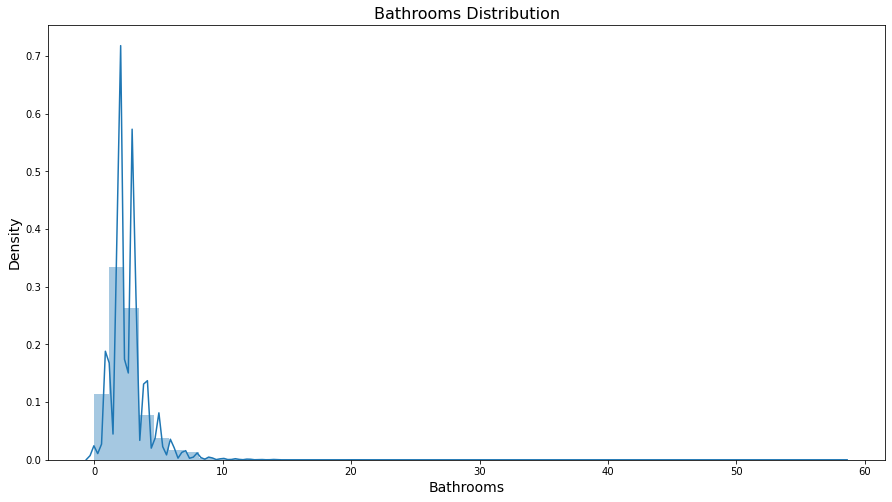

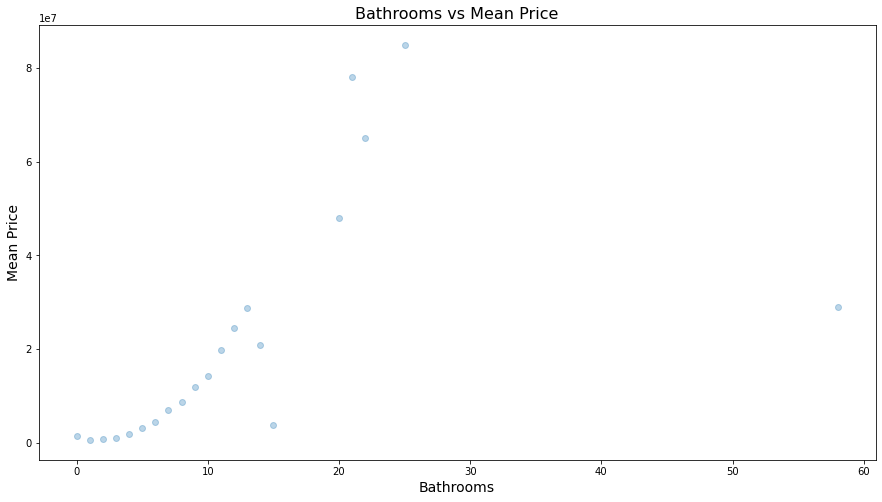

In [29]:
feature_analysis('bathrooms')

In [30]:
df_single = df_single[(df_single['bathrooms'] < 7) & (df_single['bathrooms'] != 0)] #Filtering out homes without bathrooms and more than 7 for the standard home 
df_single['bathrooms'].value_counts()

2.0    7508
3.0    5917
1.0    2319
4.0    1746
5.0     830
6.0     380
Name: bathrooms, dtype: int64

Bathrooms correlation with popularity is 0.46621641003959335
2.0    0.401497
3.0    0.316417
1.0    0.124011
4.0    0.093369
5.0    0.044385
6.0    0.020321
Name: bathrooms, dtype: float64
count    18700.000000
mean         2.593583
std          1.089140
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: bathrooms, dtype: float64


C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


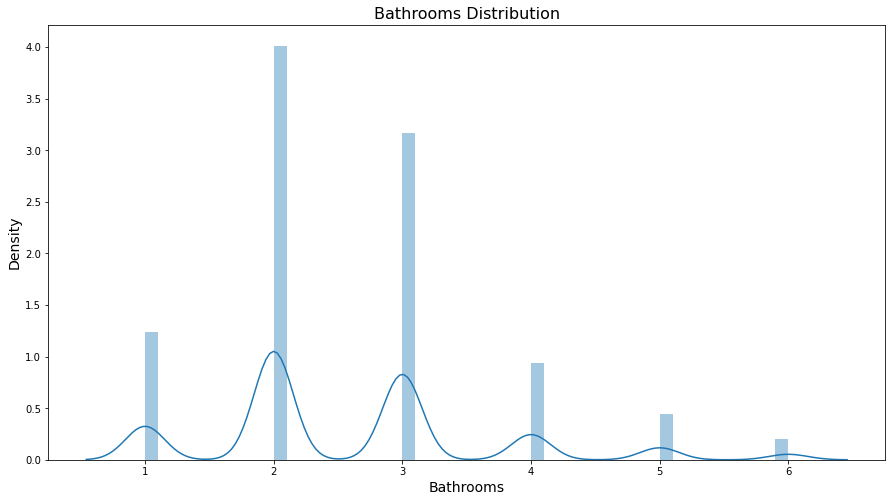

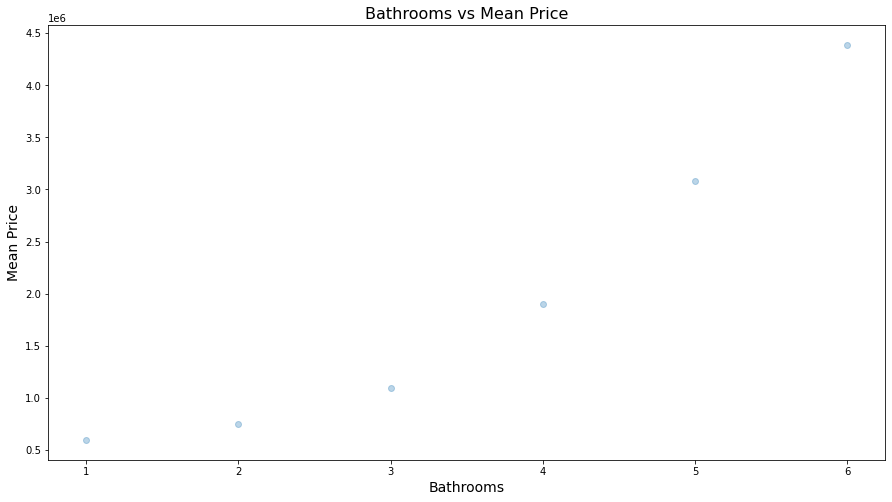

In [31]:
feature_analysis('bathrooms')

#### Bedrooms

In [32]:
df_single['bedrooms'].value_counts(normalize=True)

3.0     0.420107
4.0     0.313636
2.0     0.122086
5.0     0.103262
6.0     0.019091
1.0     0.013369
7.0     0.004385
8.0     0.002032
0.0     0.001016
9.0     0.000588
11.0    0.000160
10.0    0.000107
12.0    0.000107
32.0    0.000053
Name: bedrooms, dtype: float64

In [33]:
avg_price_bed_single = df_single.groupby('bedrooms')['price'].mean().sort_values(ascending=False)
avg_price_bed_single

bedrooms
32.0    7.500000e+06
10.0    2.772500e+06
7.0     2.454135e+06
9.0     2.340681e+06
6.0     2.119226e+06
11.0    2.066333e+06
5.0     1.894839e+06
8.0     1.599076e+06
4.0     1.290027e+06
12.0    1.124000e+06
3.0     8.820811e+05
1.0     7.448648e+05
2.0     7.064301e+05
0.0     6.106152e+05
Name: price, dtype: float64

Bedrooms correlation with popularity is 0.25254638739403384
3.0     0.420107
4.0     0.313636
2.0     0.122086
5.0     0.103262
6.0     0.019091
1.0     0.013369
7.0     0.004385
8.0     0.002032
0.0     0.001016
9.0     0.000588
11.0    0.000160
10.0    0.000107
12.0    0.000107
32.0    0.000053
Name: bedrooms, dtype: float64
count    18700.000000
mean         3.461337
std          1.040057
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         32.000000
Name: bedrooms, dtype: float64


C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


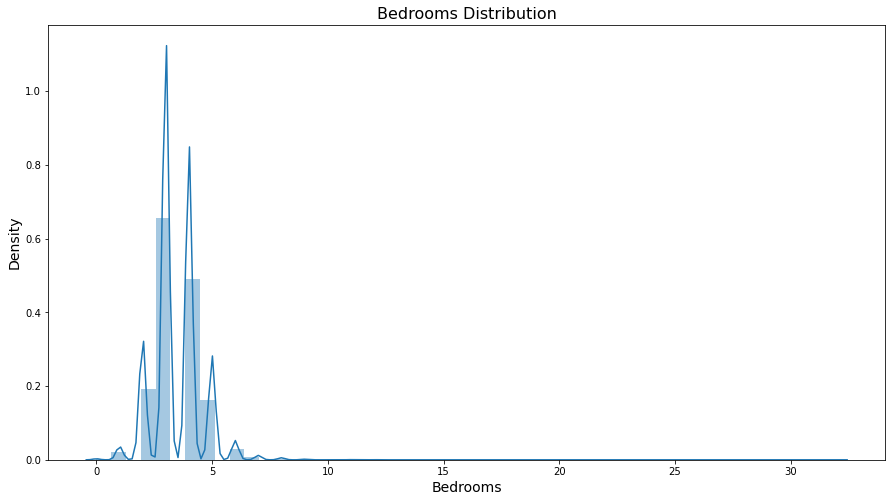

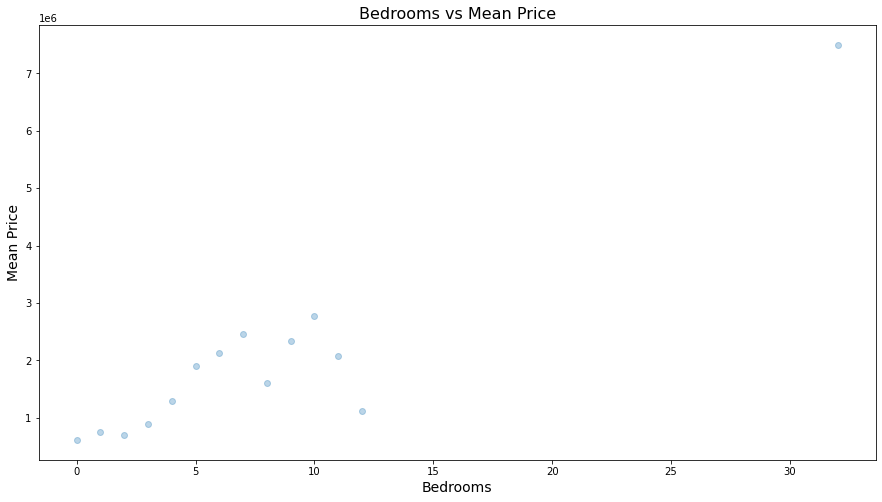

In [34]:
feature_analysis('bedrooms')

In [35]:
df_single = df_single[df_single['bedrooms'] <= 7] #Filtering out houses with more than 7 bedrooms for a standard home
df_single['bedrooms'].value_counts()

3.0    7856
4.0    5865
2.0    2283
5.0    1931
6.0     357
1.0     250
7.0      82
0.0      19
Name: bedrooms, dtype: int64

Bedrooms correlation with popularity is 0.2546324140498865
3.0    0.421391
4.0    0.314595
2.0    0.122459
5.0    0.103578
6.0    0.019149
1.0    0.013410
7.0    0.004398
0.0    0.001019
Name: bedrooms, dtype: float64
count    18643.000000
mean         3.444456
std          0.979492
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: bedrooms, dtype: float64


C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


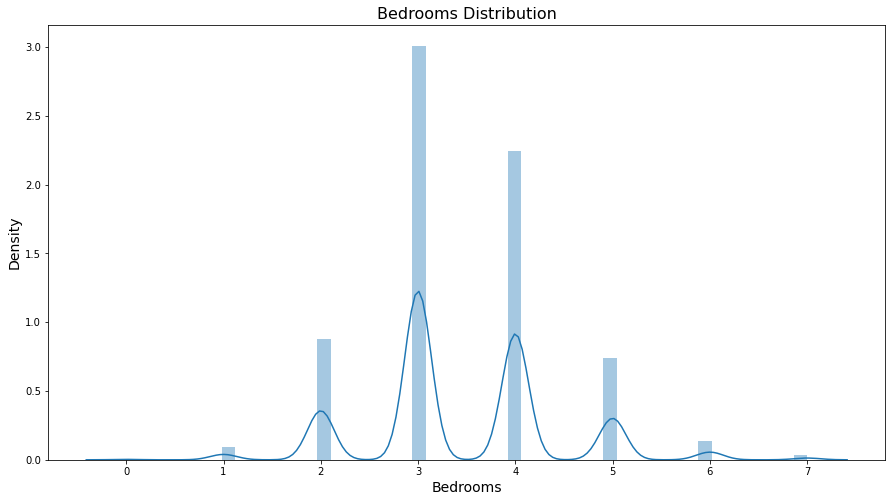

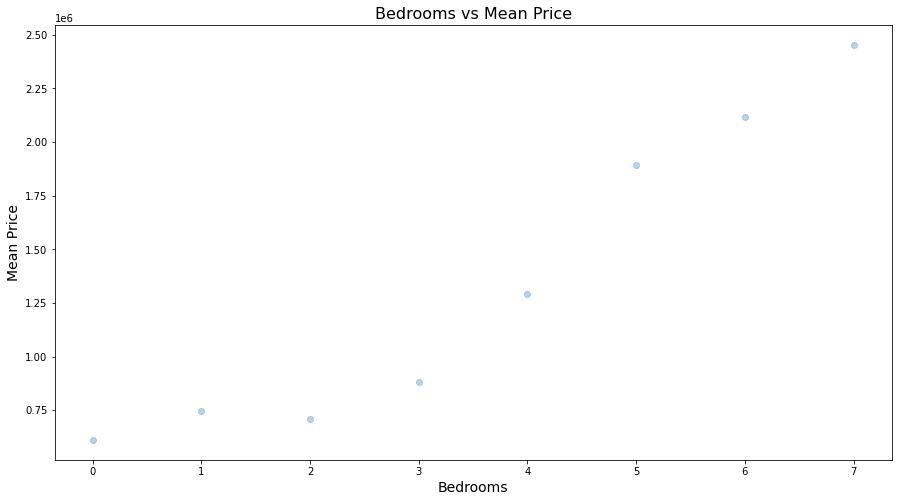

In [36]:
feature_analysis('bedrooms')

In [37]:
#bedroom_outliers = df_single[(df_single['bedrooms'] == 0) & (df_single['price'] > 1000000)]
#bedroom_outliers

In [38]:
#df_single[df_single['bedrooms'] == 0].sort_values('pricePerSquareFoot', ascending=False)

In [39]:
df_single.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18643 entries, 1 to 35388
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               18643 non-null  float64
 1   pricePerSquareFoot  18643 non-null  float64
 2   city                18643 non-null  object 
 3   yearBuilt           18643 non-null  int64  
 4   zipcode             18643 non-null  float64
 5   longitude           18643 non-null  float64
 6   latitude            18643 non-null  float64
 7   hasBadGeocode       18643 non-null  int64  
 8   description         18643 non-null  object 
 9   livingArea          18643 non-null  float64
 10  livingAreaValue     18643 non-null  float64
 11  lotAreaUnits        18643 non-null  object 
 12  bathrooms           18643 non-null  float64
 13  bedrooms            18643 non-null  float64
 14  buildingArea        18643 non-null  float64
 15  parking             18643 non-null  int64  
 16  gara

#### Year Built

In [40]:
# imbalanced data set so must deal with it by smote?

In [41]:
len(df_single['yearBuilt'].value_counts().keys())

156

In [42]:
yearBuilt_single = df_single.groupby('yearBuilt')['price'].mean().sort_values(ascending=False)
yearBuilt_single

yearBuilt
1898    3.764500e+06
1859    3.300000e+06
2022    2.906430e+06
1881    2.800000e+06
1885    2.588800e+06
            ...     
1876    5.026293e+05
1870    4.990000e+05
1868    4.990000e+05
1894    4.644500e+05
1856    3.690000e+05
Name: price, Length: 156, dtype: float64

Yearbuilt correlation with popularity is -0.04388298451800684
2005    0.020115
1950    0.019417
1955    0.018720
2004    0.018291
2021    0.017433
          ...   
9999    0.000054
1897    0.000054
1859    0.000054
1856    0.000054
1865    0.000054
Name: yearBuilt, Length: 156, dtype: float64


C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    18643.000000
mean      1948.344312
std        227.742511
min          0.000000
25%       1952.000000
50%       1973.000000
75%       1995.000000
max       9999.000000
Name: yearBuilt, dtype: float64


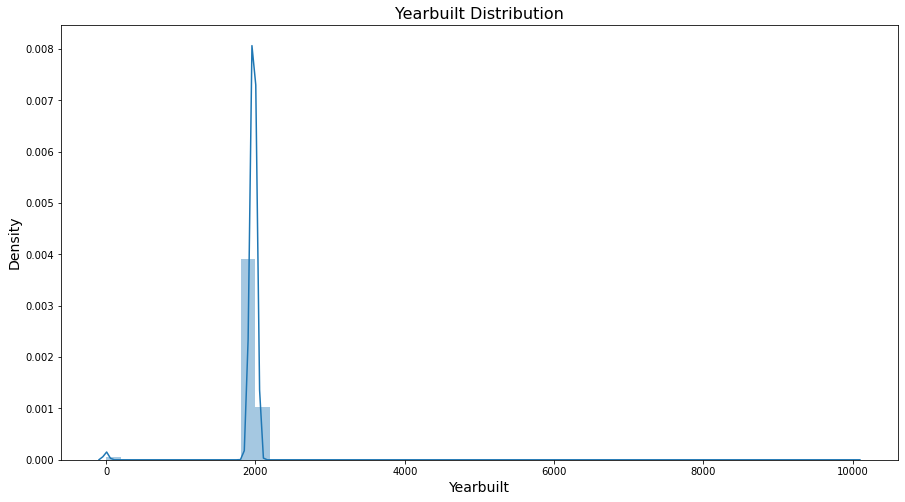

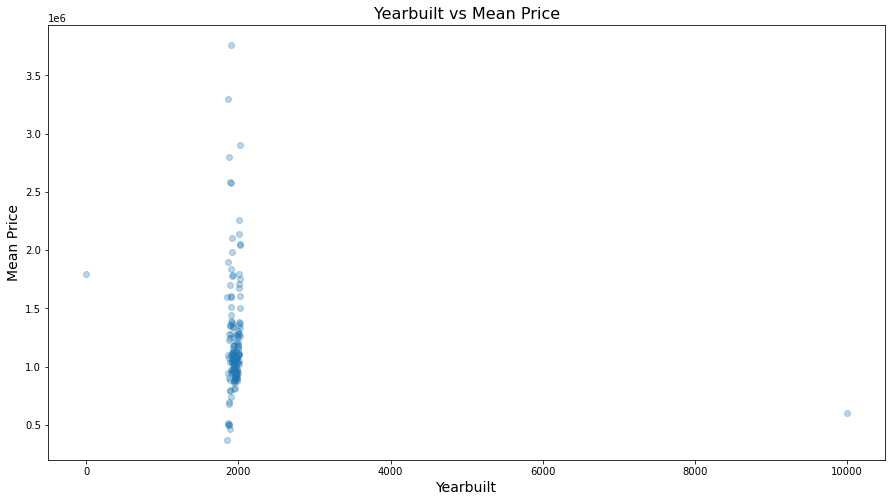

In [43]:
feature_analysis('yearBuilt')

In [56]:
df_single = df_single[(df_single['yearBuilt'] < 2023) & (df_single['yearBuilt'] != 0)]

In [57]:
df_single['yearBuilt']

1        1958
2        1959
3        1908
5        1958
6        2000
         ... 
35379    1925
35381    1926
35384    1927
35385    1924
35388    1971
Name: yearBuilt, Length: 18411, dtype: int64

Yearbuilt correlation with popularity is 0.06015961839290348
2005    0.020368
1950    0.019662
1955    0.018956
2004    0.018522
2021    0.017652
          ...   
1868    0.000054
1861    0.000054
1879    0.000054
1897    0.000054
1856    0.000054
Name: yearBuilt, Length: 154, dtype: float64
count    18411.000000
mean      1972.352615
std         28.148032
min       1850.000000
25%       1953.000000
50%       1974.000000
75%       1995.000000
max       2022.000000
Name: yearBuilt, dtype: float64


C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


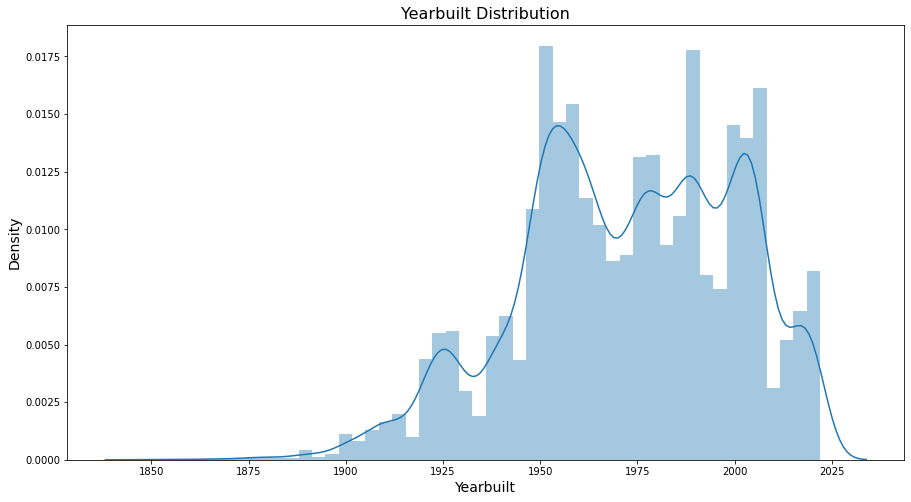

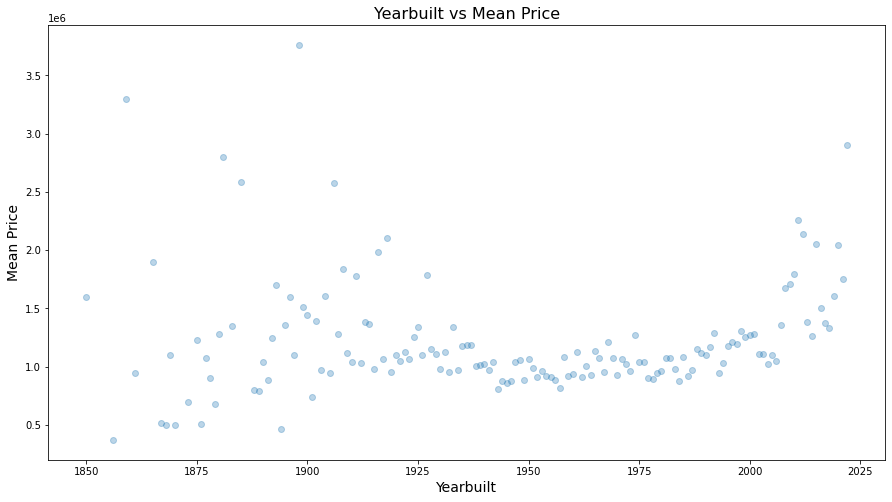

In [58]:
feature_analysis('yearBuilt')

#### Target: Popularity Analysis

In [47]:
df['price'].describe()

count    3.085300e+04
mean     1.207308e+06
std      2.665256e+06
min      0.000000e+00
25%      3.950000e+05
50%      6.900000e+05
75%      1.199999e+06
max      9.500000e+07
Name: price, dtype: float64

In [48]:
df['price'].value_counts(bins=8)

(-95000.001, 11875000.0]    30623
(11875000.0, 23750000.0]      149
(23750000.0, 35625000.0]       48
(35625000.0, 47500000.0]       16
(59375000.0, 71250000.0]        5
(47500000.0, 59375000.0]        5
(71250000.0, 83125000.0]        4
(83125000.0, 95000000.0]        3
Name: price, dtype: int64

In [49]:
df['price'].max()

95000000.0

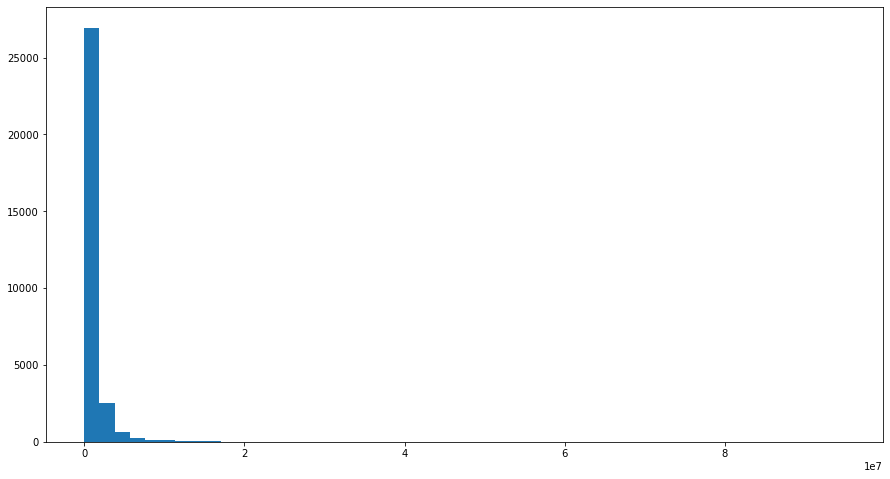

In [50]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(df['price'], bins=50);

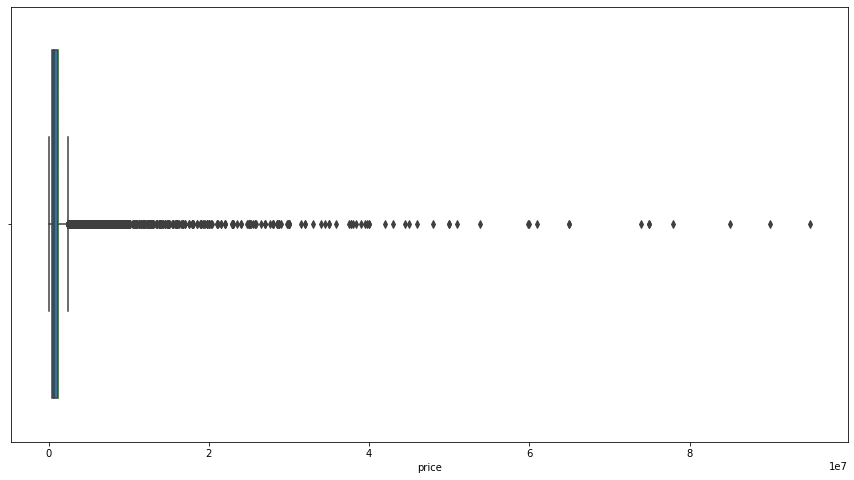

In [51]:
#Boxplot with outliers
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x=df['price'], showmeans=True, meanline=True);

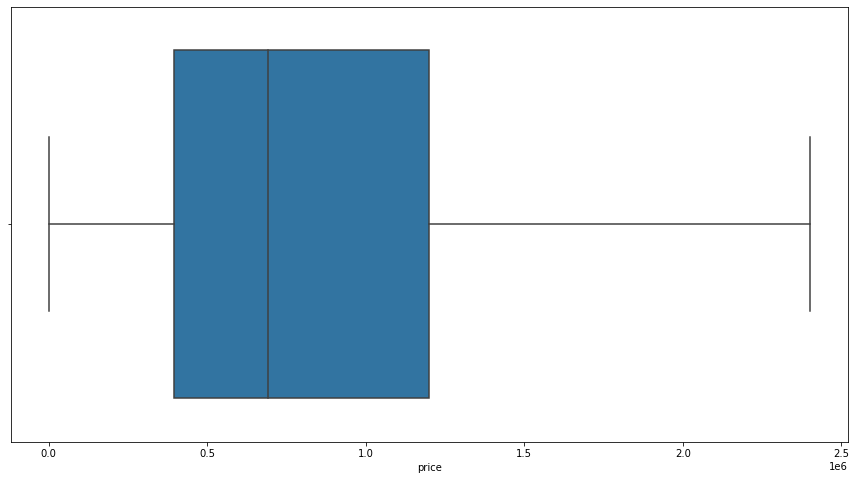

In [52]:
#Boxplot without outliers
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x=df['price'], showfliers=False);

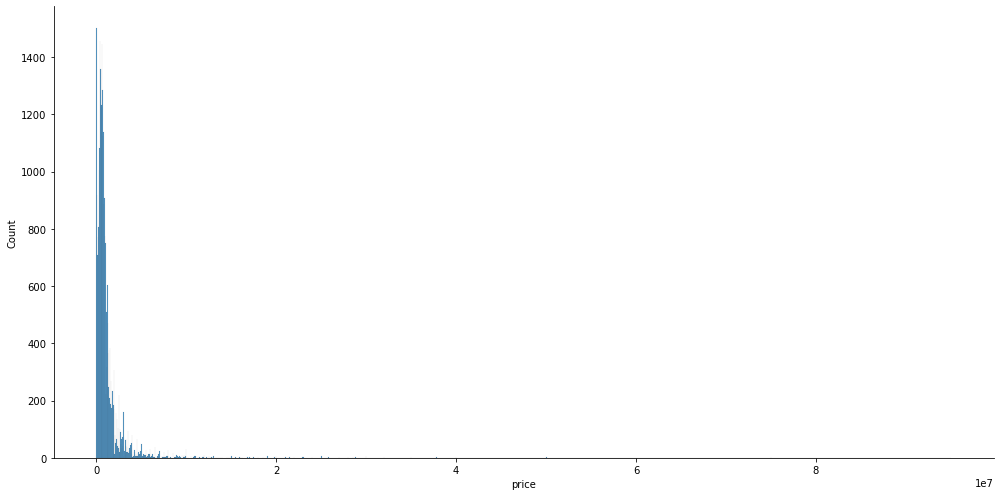

In [53]:
sns.displot(df['price'], height=7, aspect=2);

In [54]:
pop_corr = abs(df.corr()[['price']]).sort_values('price', ascending=False) #Correlation analysis against price
pop_corr

,price
price,1.000000
bathrooms,0.359275
bedrooms,0.182416
pool,0.158633
spa,0.114617
garageSpaces,0.113390
zipcode,0.080428
latitude,0.051468
yearBuilt,0.048965
hasGarage,0.045997


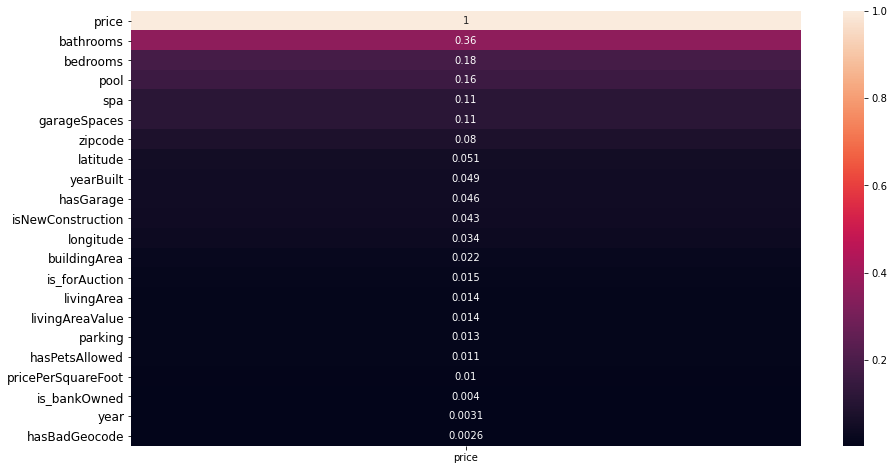

In [55]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(pop_corr, ax=ax, annot=True)
ax.set_yticklabels(labels=pop_corr.index, fontsize=12);

### Feature Exploration